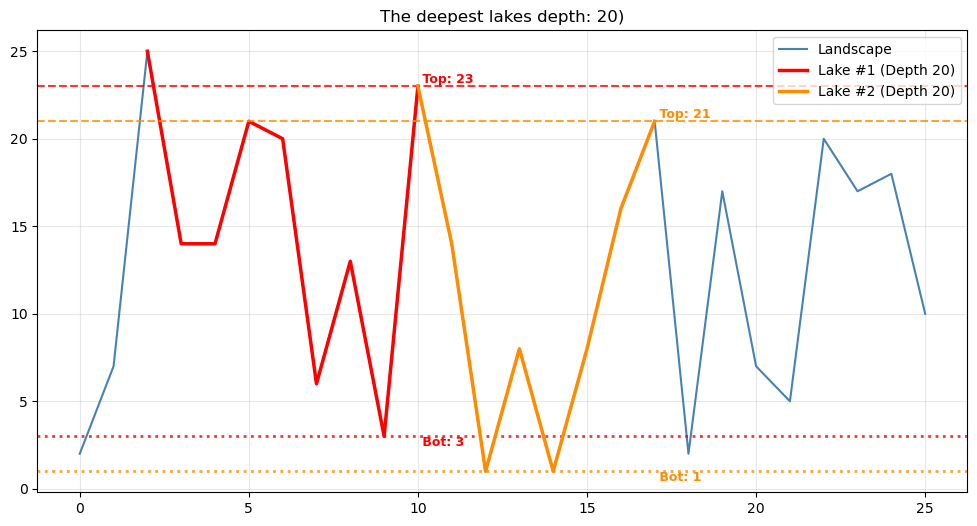

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

def analyze_and_plot_lakes(lake):
    n = len(lake)
    lake = np.array(lake)
    
    # Calculation logic
    left_max = np.zeros(n)
    left_max[0] = lake[0]
    for i in range(1, n):
        left_max[i] = max(left_max[i-1], lake[i])

    right_max = np.zeros(n)
    right_max[n-1] = lake[n-1]
    for i in range(n-2, -1, -1):
        right_max[i] = max(right_max[i+1], lake[i])

    water_level = np.minimum(left_max, right_max)
    depths = water_level - lake
    global_max_depth = np.max(depths)
    
    if global_max_depth == 0:
        print("No lake!")
        return 0

    # Search for individual lakes
    lakes_indices = []
    current_lake = []
    for i in range(n):
        if depths[i] > 0:
            current_lake.append(i)
        else:
            if current_lake:
                lakes_indices.append(current_lake)
                current_lake = []
    if current_lake:
        lakes_indices.append(current_lake)

    # Filtration of the deepest lakes
    deepest_lakes = []
    for indices in lakes_indices:
        if np.max(depths[indices]) == global_max_depth:
            deepest_lakes.append(indices)

    # Visualization
    plt.figure(figsize=(12, 6))
    
    # Landscape
    plt.plot(lake, color='steelblue', label='Landscape', linewidth=1.5)
 
    # Color iterator
    colors = cycle(['red', 'darkorange', 'purple', 'magenta', 'brown'])

    for idx, indices in enumerate(deepest_lakes):
        # Obtain a unique color for the current lake
        current_color = next(colors)
        
        # Define the boundaries of the drawing (shores)
        start_plot = max(0, indices[0] - 1)
        end_plot = min(n - 1, indices[-1] + 1)
        plot_range = range(start_plot, end_plot + 1)
        
        # Parameters of a specific lake
        lvl_water = water_level[indices[0]]       # Water level
        lvl_bottom = np.min(lake[indices])        # Lowest point level
        
        # Bottom contour (color with the current color)
        plt.plot(plot_range, lake[start_plot:end_plot+1], 
                 color=current_color, linewidth=2.5, 
                 label=f'Lake #{idx+1} (Depth {int(global_max_depth)})')

        # Water level line (upper limit)
        plt.axhline(y=lvl_water,  
                   color=current_color, linestyle='--', linewidth=1.5, alpha=0.8)
        
        # The line of the lowest point of the bottom (lower limit)
        plt.axhline(y=lvl_bottom, 
                   color=current_color, linestyle=':', linewidth=2, alpha=0.8)
        
        # Level labels (text color also corresponds to the lake)
        plt.text(end_plot, lvl_water, f' Top: {int(lvl_water)}', 
                 verticalalignment='bottom', fontsize=9, fontweight='bold', color=current_color)
        plt.text(end_plot, lvl_bottom, f' Bot: {int(lvl_bottom)}', 
                 verticalalignment='top', fontsize=9, fontweight='bold', color=current_color)

    plt.title(f"The deepest lakes depth: {int(global_max_depth)})")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

lake_data_multi = [2, 7, 25, 14, 14, 21, 20, 6, 13, 3, 23, 14, 1, 8, 1, 8, 16, 21, 2, 17,
7, 5, 20, 17, 18, 10] 

analyze_and_plot_lakes(lake_data_multi)